Importing

In [43]:
from sklearn.datasets import load_iris # for dataset
from sklearn.model_selection import train_test_split # X, Y train/test splits
from sklearn.ensemble import RandomForestClassifier # model for grid and random search
from sklearn.metrics import confusion_matrix, classification_report # for evaluation
# for grid search
from sklearn.model_selection import GridSearchCV
# for randomized search
from sklearn.model_selection import RandomizedSearchCV
# for bayes search
from skopt import BayesSearchCV
import xgboost as xgb
# for heatmap
import seaborn as sns

Dataset loading

In [44]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Grid Search

Best Params: {'max_depth': 5, 'n_estimators': 100}
Best Score: 0.9500000000000001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

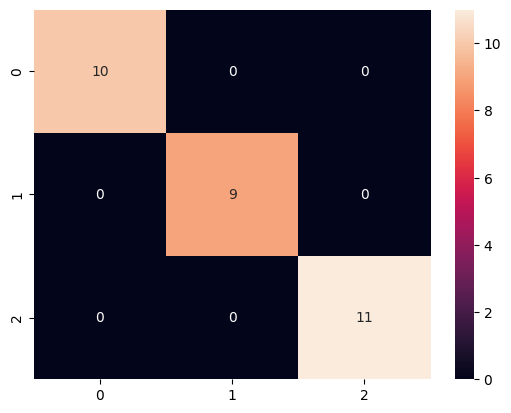

In [45]:
model = RandomForestClassifier()
params = {'n_estimators': [50, 100], 'max_depth': [3, 5]}

grid = GridSearchCV(model, params, cv=3)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Random Search

Best Params: {'n_estimators': 1100, 'max_depth': 3}
Best Score: 0.9500000000000001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

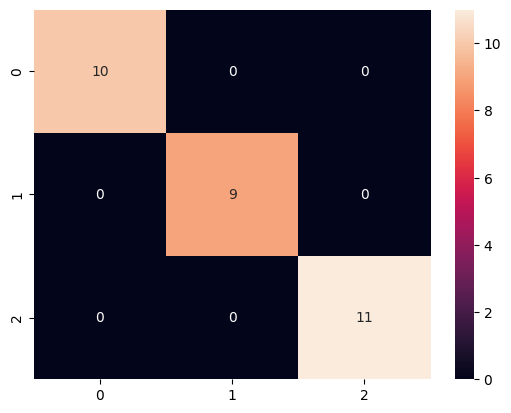

In [46]:
model = RandomForestClassifier()
params = {'n_estimators': [100, 50, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15]}

random_search = RandomizedSearchCV(model, params, n_iter=5, cv=3, random_state=42)
random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)

Bayes Search

Best Params: OrderedDict({'learning_rate': 0.4160029192647807, 'max_depth': 21, 'n_estimators': 479})
Best Score: 0.9416666666666668
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



<Axes: >

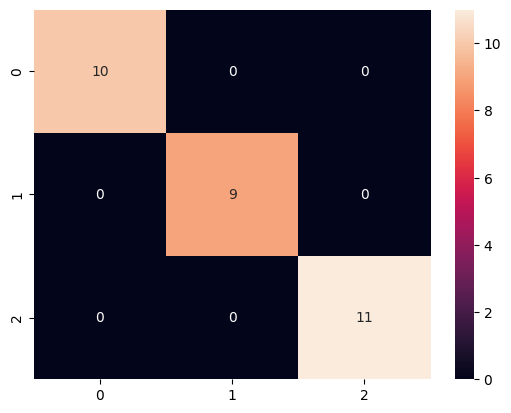

In [47]:
model = xgb.XGBClassifier()
search_space = {
    "max_depth": (4, 28),
    "n_estimators": (180, 500),
    "learning_rate": (0.01, 1.0)
}

xgb_bayes_search = BayesSearchCV(model, search_space, n_iter=5, cv=3, random_state=42)
xgb_bayes_search.fit(X_train, y_train)

print("Best Params:", xgb_bayes_search.best_params_)
print("Best Score:", xgb_bayes_search.best_score_)

best_model = xgb_bayes_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)